# DATA ANALYSIS & AI/OPTIMIZATION PROJECT - Data Visualisation


In [79]:
# System imports
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
from time import process_time

# Extra library imports
from PIL import Image
from scipy.optimize import minimize
import scipy.ndimage as ndi
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [47]:
directory_path="./train/classif.xlsx"

## 1. Repartitions between the different types of bugs

In [101]:
df = pd.read_excel(directory_path, index_col='ID')
df

,bug type,species
ID,,
1,Bee,Apis mellifera
2,Bee,Apis mellifera
3,Bee,Apis mellifera
4,Bee,Apis mellifera
5,Bee,Apis mellifera
...,...,...
246,Bee,Apis mellifera
247,Bee,Apis mellifera
248,Bee,Apis mellifera


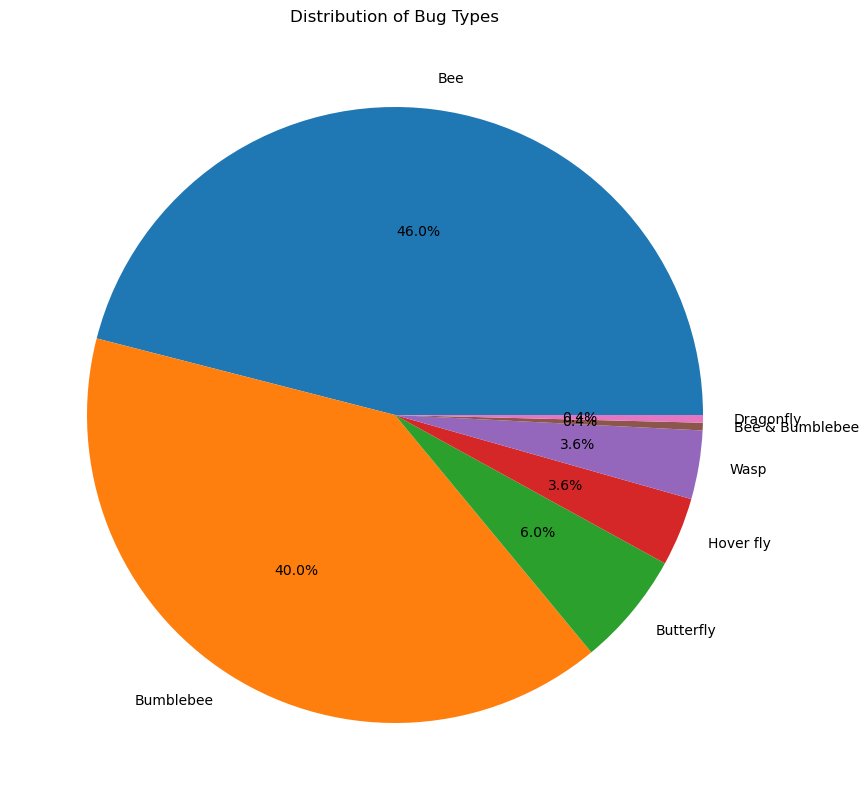

In [229]:
bug_type_counts = df['bug type'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(bug_type_counts, labels=bug_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Bug Types')
plt.show()

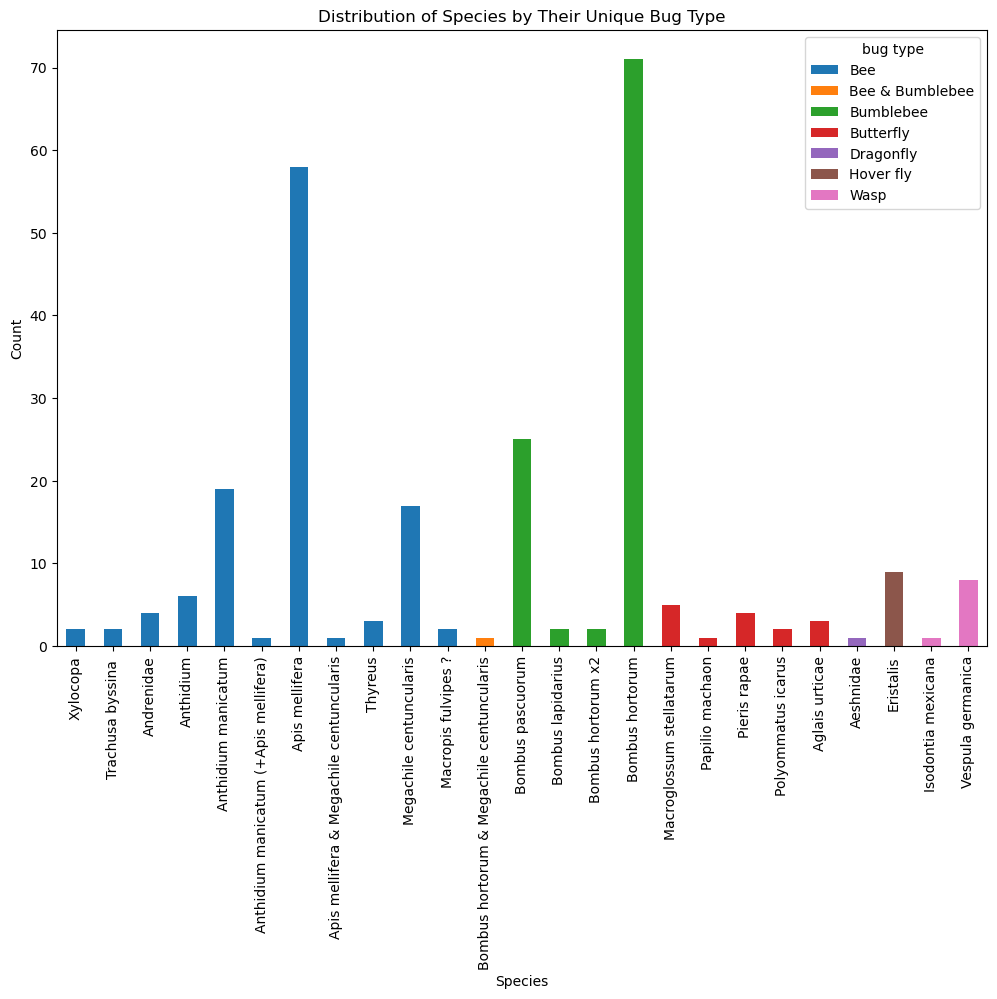

In [295]:
species_by_type = df.groupby(['species', 'bug type']).size().unstack(fill_value=0)
species_by_type['Dominant Bug Type'] = species_by_type.idxmax(axis=1)
species_by_type.sort_values(by='Dominant Bug Type', inplace=True)
species_by_type.drop(columns='Dominant Bug Type', inplace=True)

species_by_type.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Species by Their Unique Bug Type')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()